Predict the income of an adult based  on the census data

In [1]:
# Import Libraries
import pandas as pd

In [2]:
# Read Dataset

data = pd.read_csv("D:\\Python\\decisiontreeAdultIncome.csv")
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [3]:
# Check for missing Values
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

In [4]:
# Check data type
data.dtypes

age                int64
wc                object
education         object
marital status    object
race              object
gender            object
hours per week     int64
IncomeClass       object
dtype: object

In [5]:
# Create Dummy Variables

data_p = pd.get_dummies(data, drop_first= True)

In [6]:
data_p.dtypes

age                              int64
hours per week                   int64
wc_ Local-gov                    uint8
wc_ Never-worked                 uint8
wc_ Private                      uint8
education_ Doctorate             uint8
education_ HS-grad               uint8
education_ Masters               uint8
education_ Preschool             uint8
education_ Prof-school           uint8
education_ Some-college          uint8
marital status_ Never-married    uint8
marital status_ Widowed          uint8
marital status_Married           uint8
race_ Asian-Pac-Islander         uint8
race_ Black                      uint8
race_ Other                      uint8
race_ White                      uint8
gender_ Male                     uint8
IncomeClass_ >50K                uint8
dtype: object

In [7]:
# Creating X and Y Variable

X = data_p.iloc[:,:-1]
y = data_p.iloc[:,-1]

# Split the dataset into train and test



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1234,stratify= y)

# We are going to try different machine learning model

In [9]:
# Decesion tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 1234)

dtc.fit(X_train, y_train)
Y_predict = dtc.predict(X_test)

In [10]:
# Evalute the Confusion matrics and get Accuracy Score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , Y_predict)
score = dtc.score(X_test, y_test)
score


0.7710965133906014

In [11]:
print("Decesion tree accuracy: {: .2f}%".format(dtc.score(X_test, y_test)*100))

Decesion tree accuracy:  77.11%


# Hyperparameter Tuning with RandomizedSearchCV
# We are going to tune:
#     * Decesion tree Classifier()

In [12]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [13]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [14]:
# Instantiate a Decision Tree classifier: dtc
dtc = DecisionTreeClassifier()

In [15]:
# Instantiate the RandomizedSearchCV object: dtc_cv
dtc_cv = RandomizedSearchCV(dtc, param_dist, cv=5)

In [16]:
# Fit it to the data
dtc_cv.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [17]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.8099763079685701


# Hyperparameter Tuning With GridSearchCV
# We are going to tune:
#     * Decesion Tree Classifier()

In [18]:
# Import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 10, 20],
               'max_depth': [None, 2, 5, 10],
               'min_samples_leaf': [1, 5, 10],
               'max_leaf_nodes': [None, 5, 10, 20]}



In [19]:
# Instantiate a Decision Tree classifier: tree
dtc1 = DecisionTreeClassifier()

In [20]:
# Instantiate the GridSearchCV object: tree_cv
dtc1_cv = GridSearchCV(dtc1, parameters, cv=5)

In [21]:
# Fit it to the data
dtc1_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [22]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc1_cv.best_params_))
print("Best score is {}".format(dtc1_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best score is 0.81401971139216


# Best Score of Decesion tree  is
0.8139691808211644

# K-Nearest Neighbors (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

Y_predict = knn.predict(X_test)

In [26]:
# Build the confusion matrix and get the accuracy/score

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test , Y_predict)

score_knn = knn.score(X_test, y_test)
score_knn

0.7732861714670709

In [27]:
print("K-Nearest Neighbors (KNN): {: .2f}%".format(knn.score(X_test, y_test)*100))

K-Nearest Neighbors (KNN):  77.33%


# Hyperparameter Tuning with RandomizedSearchCV
#    We are going to tune:
#      * K-Nearest Neighbors (KNN)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [43]:
#Define the parameter values that should be searched
k_range=list(range(1,31))
options=['uniform', 'distance']

In [44]:
param_grid = dict(n_neighbors=k_range, weights=options)
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['uniform', 'distance']}

In [45]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

knn=KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [46]:
# Fit it to the data
knn_cv.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
  

In [47]:
# Print the tuned parameters and score
print("Tuned KNN: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN: {'weights': 'uniform', 'n_neighbors': 27}
Best score is 0.7961291998747209


# Hyperparameter Tuning With GridSearchCV¶
#   We are going to tune:
#      * K-Nearest Neighbors (KNN)

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
knn_gd = GridSearchCV(knn, parameters, cv=5)

In [49]:
# Fit it to the data
knn_gd.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
# Print the tuned parameters and score
print("Tuned KNN: {}".format(knn_gd.best_params_))
print("Best score is {}".format(knn_gd.best_score_))

Tuned KNN: {'n_neighbors': 14}
Best score is 0.7943601778747611


# LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

Y_predict = lr.predict(X_test)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
# Build the confusion matrix and get the accuracy/score

from sklearn.metrics import confusion_matrix
cm3  = confusion_matrix(y_test , Y_predict)

score_lr = lr.score(X_test, y_test)
score_lr

0.8108472292403571

# Hyperparameter Tuning with RandomizedSearchCV
#   We are going to tune:
#   * LogisticRegression()

In [53]:
# Create a Hyperparameter grid for LogisticRegression
rg_gid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [54]:
# Setup Hyperparameter search for LogisticRegression  

lr_cv = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= rg_gid,
                                cv= 5,
                                n_iter= 20,
                                verbose= True)


In [55]:
# Fit it to the data
lr_cv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [56]:
# Print the tuned parameters and score
print("Tuned LogisticRegression: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned LogisticRegression: {'solver': 'liblinear', 'C': 4.281332398719396}
Best score is 0.8140705356713012


# Hyperparameter Tuning With GridSearchCV¶
#   We are going to tune:
#    * LogisticRegression()

In [57]:
# Different Hyperparameter for our Logistic regression Model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

In [59]:
# Setup grid Hyperparameter search for LogisticRegression
lr_gs = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose= True)

In [60]:
# Fit it to the data
lr_gs.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [61]:
# Print the tuned parameters and score
print("Tuned LogisticRegression: {}".format(lr_gs.best_params_))
print("Best score is {}".format(lr_gs.best_score_))

Tuned LogisticRegression: {'C': 0.20433597178569418, 'solver': 'liblinear'}
Best score is 0.8141212067114099


# Conclusion

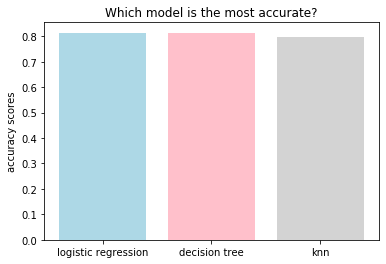

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

models = ['logistic regression', 'decision tree', 'knn']
acc_scores = [0.8141, 0.8139, 0.7961]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

In [ ]:
After training our dataset with 3 different model, we conclude that LogisticRegression is best model for our dataset.
(via the highest accuracy score = 0.8141).